## 卷积积分（Convolution Integral）

### 一、连续时间信号的时域分解(脉冲分解)

$$u(t) = \int_{-\infty}^{\infty} u(\tau)\delta(t-\tau)\ d\tau$$

推导方法从略，反正就是把信号分解成一个个矩形，矩形底面宽 $\tau$ 取极限就得到该公式。

验证该公式倒是很容易，从左边可以很容易推得值为 $u(t)$

从这里得到一个运算：卷积积分

$$f(t) * g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)\ d\tau$$

### 二、使用卷积求解　LTI 系统的零状态响应

![](convolution-LTI.png)

### 卷积和的辅助求解方法

![](convolution-sum-methods.png)

对位相乘法很直观，表格法更方便，而矩阵法更适合用于计算机求解。（实际上一般使用FFT计算卷积）

### 解卷积（离散）
![](deconvolution.png)
右侧为通过矩阵法逆推解卷积公式。或者也能通过 $x = A^{-1}b$ 求解。

### 扩展：二维卷积的定义

![](multi-dimension_convolution.png)
相当于把卷积操作在两个维度上都做了一次。

#### 二维卷积的应用：图像处理

![](image-processing.png)

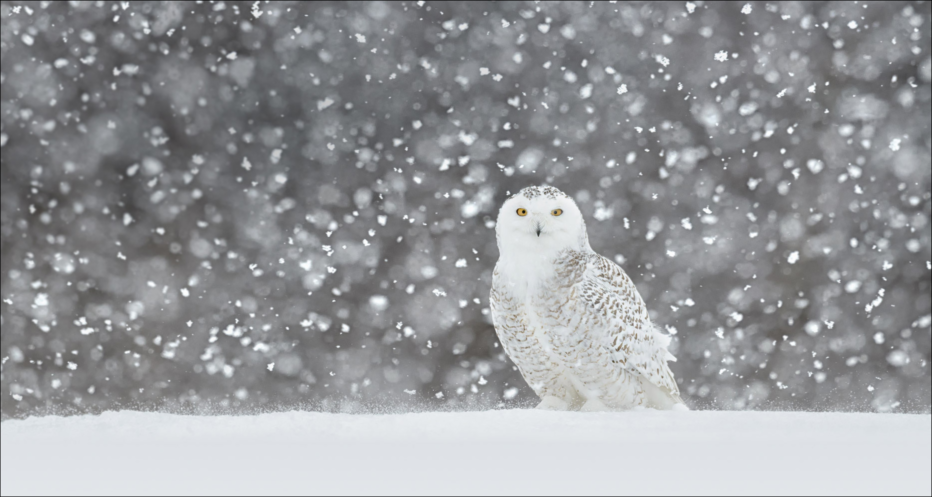

In [53]:
# 使用 julia 做边缘提取
import DSP: conv2
using Images

# 这正是上面截图中的边缘提取算子（laplacian 算子）
laplacian_op = [0 1 0; 1 -4 1; 0 1 0]
sobel_op = [1 2 1; 0 0 0 ; -1  -2 -1]
prewitt_op = [1 1 1; 0 0 0; -1 -1 -1]

img_test = load("conv-test.png")

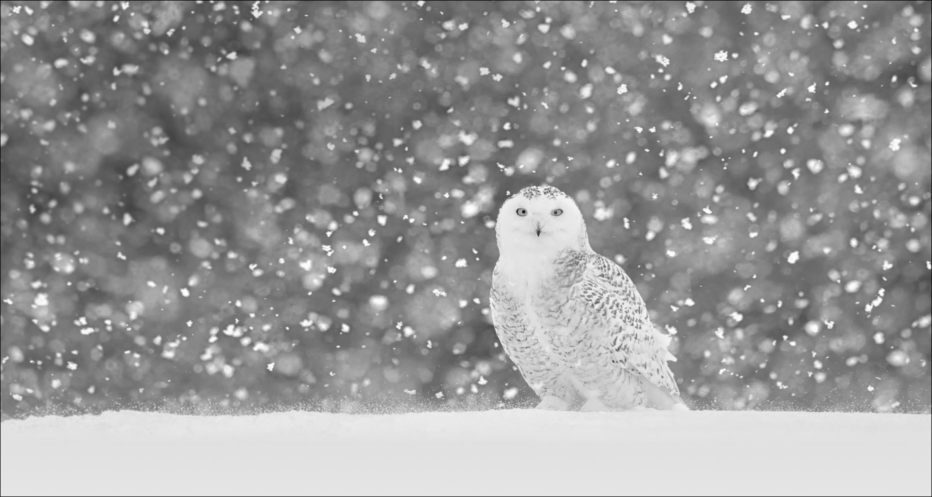

In [49]:
img_test_gray = Gray.(img_test)

In [51]:
array_gray = map(x -> trunc(Int64, x.val * 255), img_test_gray);

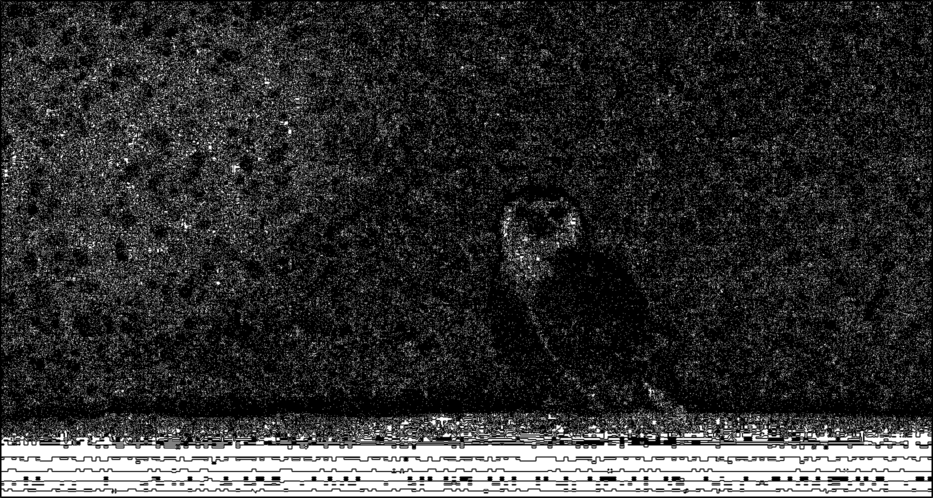

In [56]:
res = conv2(array_gray, laplacian_op)
res = iszero.(res)
Gray.(res)

### 资料

- [如何通俗易懂地解释卷积？](https://www.zhihu.com/question/22298352)